In [ ]:
# @Author:  Vikram(B19CSE098)

installed dependencies

In [ ]:
! pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 748.9/748.9 KB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.2 MB/s eta 0:00:00
  Created wheel for pyvis: filename=pyvis-0.3.1-py3-none-any.whl size=755850 sha256=62bd5a11c333fecdc55ac0420427bc006ed1c22af1df12859dcfc1fc23e512f3
  Stored in directory: /root/.cache/pip/wheels/a4/0c/61/8469ca276f96ab772c3acc7f47d71e9737cbdf6f446f017f48
Successfully built pyvis


import libraries

In [ ]:
import pandas as pd
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt

load data after converting t to csv from pdf using online sources

In [ ]:
df = pd.read_csv("Flight_data.csv")
df.head()

,Origin,Destination,Flight Number,Departure Time,Arrival Time,Flight Time,Routing,Days Of\nOperations,Connection Flight\nNo,Effective From,EffectiveTo
0,Abu Dhabi,Ahmedabad,G8 76,21:40,07:35,08:25,Via DEL,"M,Tu,W,Th,F,Su",G8 719,02/05/2023,02/11/2023
1,Abu Dhabi,Ahmedabad,G8 76,21:40,18:15,19:05,Via DEL,F,G8 717,02/05/2023,02/14/2023
2,Abu Dhabi,Bagdogra,G8 76,21:40,14:25,15:15,Via DEL,"M,Tu,W,Th,Sa,Su",G8 153,02/05/2023,02/09/2023
3,Abu Dhabi,Bagdogra,G8 76,21:40,08:25,09:15,Via DEL,Daily,G8 263,02/05/2023,02/14/2023
4,Abu Dhabi,Bangkok,G8 76,21:40,13:00,12:20,Via DEL,Daily,G8 37,02/05/2023,03/24/2023


In [ ]:
df1=df
time = pd.DatetimeIndex(df1['Flight Time'])

df1['Flight Time']=time.hour * 60 + time.minute
df1.head()

,Origin,Destination,Flight Number,Departure Time,Arrival Time,Flight Time,Routing,Days Of\nOperations,Connection Flight\nNo,Effective From,EffectiveTo
0,Abu Dhabi,Ahmedabad,G8 76,21:40,07:35,505,Via DEL,"M,Tu,W,Th,F,Su",G8 719,02/05/2023,02/11/2023
1,Abu Dhabi,Ahmedabad,G8 76,21:40,18:15,1145,Via DEL,F,G8 717,02/05/2023,02/14/2023
2,Abu Dhabi,Bagdogra,G8 76,21:40,14:25,915,Via DEL,"M,Tu,W,Th,Sa,Su",G8 153,02/05/2023,02/09/2023
3,Abu Dhabi,Bagdogra,G8 76,21:40,08:25,555,Via DEL,Daily,G8 263,02/05/2023,02/14/2023
4,Abu Dhabi,Bangkok,G8 76,21:40,13:00,740,Via DEL,Daily,G8 37,02/05/2023,03/24/2023


circular plot

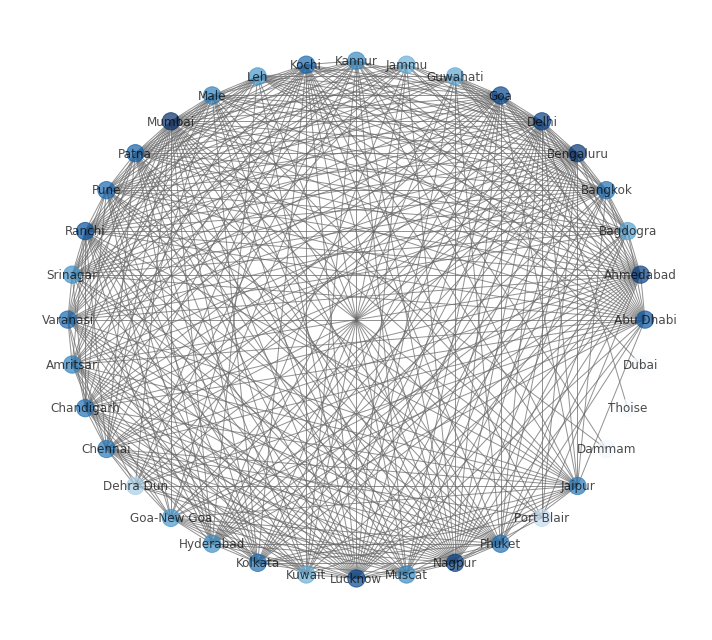

In [ ]:
plt.figure(figsize =(10, 9))
G = nx.from_pandas_edgelist(df1 ,source ='Origin',target = 'Destination') 
pos = nx.circular_layout(G)

node_color = [G.degree(v) for v in G]

  
# node_size = [G.degree(v) for v in G]



# edge_width = [0.0015 * df['Flight Time'] for u, v in G.edges()]

  
nx.draw_networkx(G, pos, alpha = 0.7, node_color=node_color,
                 with_labels = True,
                 edge_color ='.4', cmap = plt.cm.Blues)
  
plt.axis('off')
plt.tight_layout();

random layout plot 

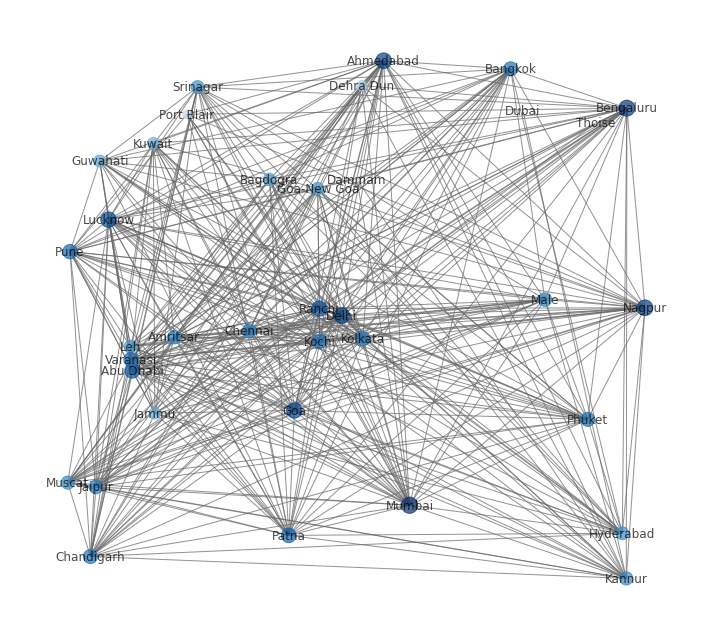

In [ ]:
plt.figure(figsize =(10, 9))
G = nx.from_pandas_edgelist(df1 ,source ='Origin',target = 'Destination') 
pos = nx.random_layout(G)

node_color = [G.degree(v) for v in G]

  
node_size = [G.degree(v)*8 for v in G]



# edge_width = [0.0015 * df['Flight Time'] for u, v in G.edges()]

  
nx.draw_networkx(G, pos, alpha = 0.7,node_color  = node_color, node_size= node_size,
                 with_labels = True,
                 edge_color ='.4', cmap = plt.cm.Blues)
  
plt.axis('off')
plt.tight_layout();

Interactive graph for avobe data
along with selection of ports using pyvis

In [ ]:

net  = Network(notebook=True, cdn_resources='remote', bgcolor="#132d2e", font_color="white", select_menu=True)
net.repulsion(node_distance=200, spring_length=150)
net.from_nx(G)

net.show('graph2.html')

